# ABOUT DATASET      
  

 What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

# RECOMMENDER SYSTEM
Recommender systems are used in a variety of areas, with commonly recognised examples taking the form of playlist generators for video and music services, product recommenders for online stores, or content recommenders for social media platforms and open web content recommenders. These systems can operate using a single input, like music, or multiple inputs within and across platforms like news, books and search queries. There are also popular recommender systems for specific topics like restaurants and online dating. Recommender systems have also been developed to explore research articles and experts,collaborators, and financial services.
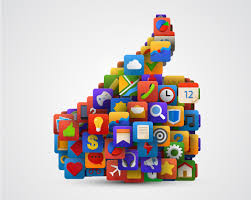

   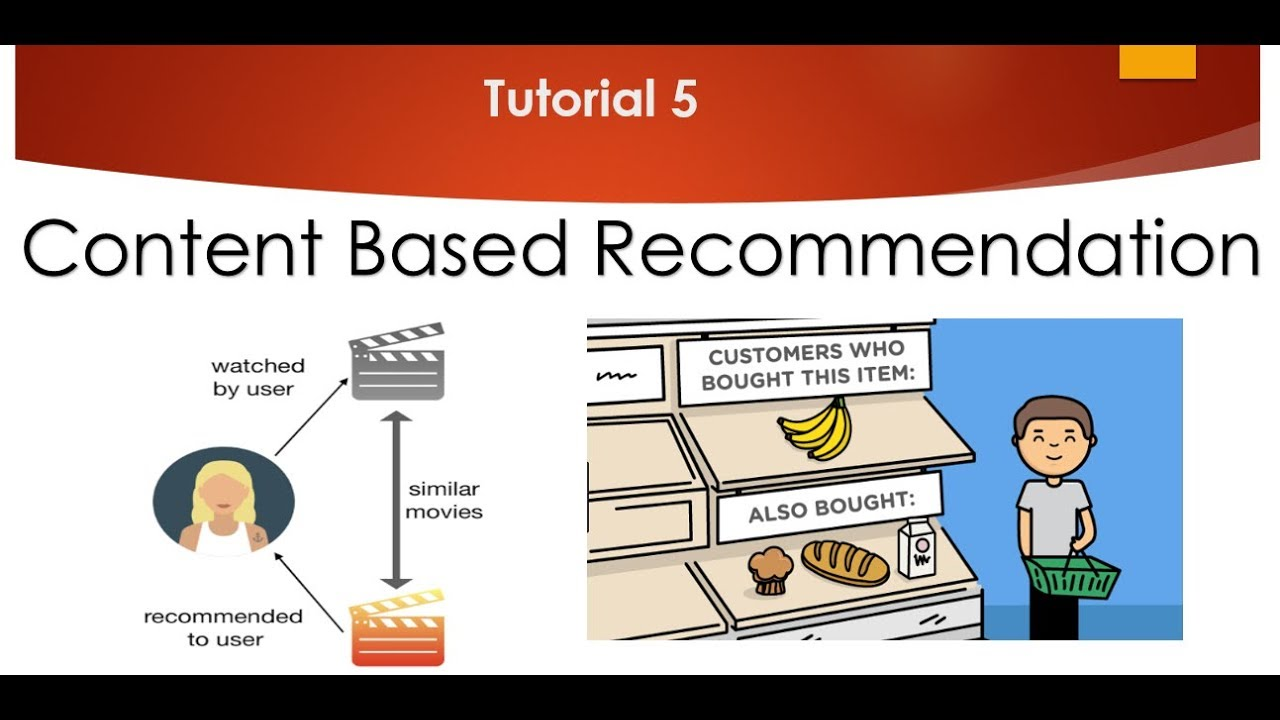

In [1]:
import os
os.listdir()

['__notebook__.ipynb']

![car_gif_url](https://media0.giphy.com/media/Ln2dAW9oycjgmTpjX9/giphy.gif)

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)
cf.go_offline()
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



# IMPORT DATASET

In [3]:
movies=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
credits=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [4]:
movies.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [5]:
credits.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


# MERGE CREDITS AND MOVIES DATAFRAME

In [6]:
movies=movies.merge(credits,right_on='id',left_on='movie_id')

In [7]:
movies.head(2)

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


# VISUALIZATIONS

In [8]:
px.scatter(movies,x='release_date',y='vote_average',labels={'x':'release_date','y':'vote_average'})

In [9]:
px.histogram(movies,x='title_x',y='vote_count',labels={'x':'title_x','y':'vote_count'})

In [10]:
px.density_heatmap(movies,x='runtime',y='revenue',labels={'x':'runtime','y':'revenue'})

# DATA PREPROCESSING

In [11]:
movies.rename(columns={'title_x':'title'},inplace=True)

In [12]:
def fetch(list):
    l=[]
    for i in eval(list):
        l.append(i['name'])
    return l

In [13]:
movies['genres']=movies['genres'].apply(fetch)
movies['keywords']=movies['keywords'].apply(fetch)

In [14]:
def get_cast(list):
    l=[]
    count=0
    for i in eval(list):
        if count<3:
            l.append(i['name'])
            count=count+1
        else:
            break
    return l

In [15]:
movies['cast']=movies['cast'].apply(get_cast)

In [16]:
def get_director(list):
    l=[]
    for i in eval(list):
        if i['job']=='Director':
            l.append(i['name'])
            break
    return l

In [17]:
movies['crew']=movies['crew'].apply(get_director)

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   id                    4803 non-null   int64  
 8   keywords              4803 non-null   object 
 9   original_language     4803 non-null   object 
 10  original_title        4803 non-null   object 
 11  overview              4800 non-null   object 
 12  popularity            4803 non-null   float64
 13  production_companies  4803 non-null   object 
 14  production_countries  4803 non-null   object 
 15  release_date         

In [19]:
movies.isnull().sum()

movie_id                   0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_y                    0
vote_average               0
vote_count                 0
dtype: int64

In [20]:
movies.dropna(inplace=True)

In [21]:
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [22]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [23]:
movies['genres']=movies['genres'].apply(lambda x:[i.replace(' ','') for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(' ','') for i in x])
movies['overview']=movies['overview'].apply(lambda x:x.split(' '))

In [24]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [25]:
movies=movies[['movie_id','title','tags']]

In [26]:
movies.head(2)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."


In [27]:
movies['tags']=movies['tags'].apply(lambda x:[i.lower() for i in x])
def useful_words(list):
    y=[]
    for text in list:
         if text not in stopwords.words('english') and text not in string.punctuation:
                y.append(text)
    return y
movies['tags']=movies['tags'].apply(lambda x:useful_words(x))
ps=PorterStemmer()
def stemming(list):
    y=[]
    for text in list:
        y.append(ps.stem(text))
    return y
movies['tags']=movies['tags'].apply(lambda x:stemming(x))
movies['tags']=movies['tags'].apply(lambda x:" ".join(x))

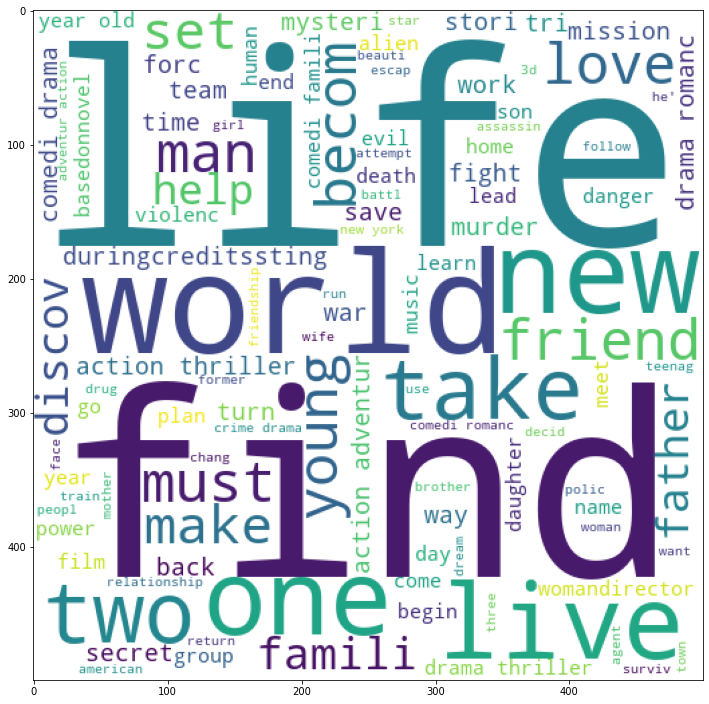

In [28]:
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(movies['tags'].str.cat(sep=" "))
plt.imshow(w_c)

In [29]:
tfidf=TfidfVectorizer(max_features=5000)
x=tfidf.fit_transform(movies['tags']).toarray()

In [30]:
cosine_similarity=cosine_similarity(x)

In [31]:
def recommendation(movie):
    index=movies[movies['title']==movie].index[0]
    similar_movies=sorted(enumerate(cosine_similarity[index]),reverse=True,key=lambda x:x[1])[1:11]
    for i in similar_movies:
        print(movies.iloc[i[0]].title)


In [32]:
recommendation("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
Pirates of the Caribbean: On Stranger Tides
Life of Pi
Captain Phillips
Master and Commander: The Far Side of the World
The SpongeBob Movie: Sponge Out of Water
Poseidon
Independence Day: Resurgence
Disturbia


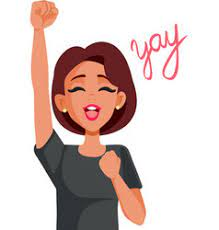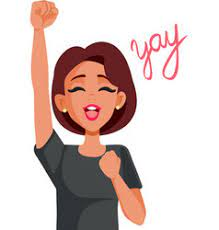